<a href="https://colab.research.google.com/github/divy16/divy_11/blob/main/Tree_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
# !nvidia-smi

In [ ]:
!pip install DeepForest

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.0/20.0 MB 46.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.6/39.6 MB 15.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 777.7/777.7 kB 66.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.6/20.6 MB 75.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 488.6/488.6 kB 49.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 806.1/806.1 kB 60.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.1/51.1 kB 8.3 MB/s eta 0:00:00


In [ ]:
# from deepforest import main
# m = main.deepforest()
# m.use_release()
# print("Current device is {}".format(m.device))
# m.to("cuda")
# print("Current device is {}".format(m.device))

Reading config file: /usr/local/lib/python3.10/dist-packages/deepforest/data/deepforest_config.yml


Downloading: "https://download.pytorch.org/models/retinanet_resnet50_fpn_coco-eeacb38b.pth" to /root/.cache/torch/hub/checkpoints/retinanet_resnet50_fpn_coco-eeacb38b.pth
100%|██████████| 130M/130M [00:01<00:00, 83.8MB/s]


No validation file provided. Turning off validation loop


INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


NEON.pt: 129MB [00:01, 125MB/s]                           


Model was downloaded and saved to /usr/local/lib/python3.10/dist-packages/deepforest/data/NEON.pt
Loading pre-built model: https://github.com/weecology/DeepForest/releases/tag/1.0.0
No of Trees are:  168


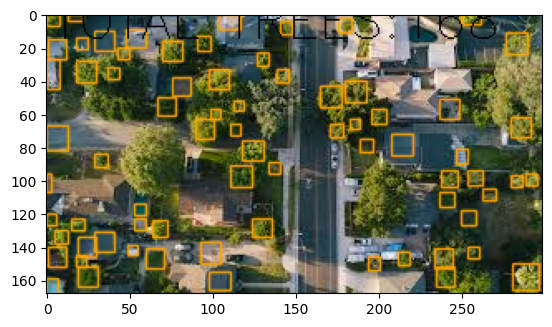

In [ ]:
from deepforest import get_data
from deepforest import main
import os
import cv2
import matplotlib.pyplot as plt
model = main.deepforest()
model.use_release()

img = model.predict_image(path="/content/trees_city.jpg",return_plot=True)

cv2.putText(img,"TOTAL TREES:"+ str(len(img)), (3, 14), cv2.FONT_HERSHEY_SIMPLEX,1.0,(0,0,0))

print("No of Trees are: ",len(img))
#predict_image returns plot in BlueGreenRed (opencv style), but matplotlib likes RedGreenBlue, switch the channel order.
plt.imshow(img[:,:,::-1])

Reading config file: /usr/local/lib/python3.10/dist-packages/deepforest/data/deepforest_config.yml


INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


No validation file provided. Turning off validation loop
Model from DeepForest release https://github.com/weecology/DeepForest/releases/tag/1.0.0 was already downloaded. Loading model from file.
Loading pre-built model: https://github.com/weecology/DeepForest/releases/tag/1.0.0


/usr/local/lib/python3.10/dist-packages/deepforest/main.py:339: UserWarning: Image type is uint8, transforming to float32. This assumes that the range of pixel values is 0-255, as opposed to 0-1.To suppress this warning, transform image (image.astype('float32')
  warnings.warn(f"Image type is {image.dtype}, transforming to float32. "


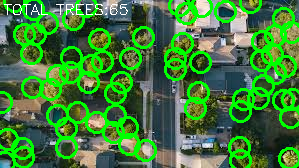

-1

In [ ]:
import cv2
import deepforest
from google.colab.patches import cv2_imshow
img_path="/content/trees_city.jpg"
img=cv2.imread(img_path)
my_model=main.deepforest()
my_model.use_release()
# cv2_imshow(img)
cv2.waitKey(0)

box_info=my_model.predict_image(img,return_plot=False)
box_info

for n in range (len(box_info)):
  x=(box_info.xmin[n]+box_info.xmax[n])/2
  y=(box_info.ymin[n]+box_info.ymax[n])/2
  cv2.circle(img, (int(x),int(y)),10,(0,255,0),2)

cv2.putText(img,"TOTAL TREES:"+ str(len(box_info)), (3, 14), cv2.FONT_HERSHEY_SIMPLEX,0.5,(255,255,255))

cv2_imshow(img)
cv2.waitKey(0)